# Projected US Population Growth (2020 - 2100)

### This notebook visualizes the projected US population growth broken down by county from 2020 - 2100. 

This project uses python to take an excel spreedsheet generated by CIESIN and SEDAC as input. It plots the data on 9 scatter-plot graphs, one for each 10 year interval. It finally sumarizes the data, and outputs a new excel spreedsheet that breaks down the number of counties that fell within certain population ranges.  

#### Citations:
- Hauer, M., and Center for International Earth Science Information Network - CIESIN - Columbia University. 2021. Georeferenced U.S. County-Level Population Projections, Total and by Sex, Race and Age, Based on the SSPs, 2020-2100. Palisades, NY: NASA Socioeconomic Data and Applications Center (SEDAC).
- Hauer, M. E. 2019. Population Projections for U.S. Counties by Age, Sex, and Race Controlled to Shared Socioeconomic Pathway. Scientific Data 6: 190005.

#### Python Libraries:
- pandas: used to read the population data from SEDAC stored as an excel spreedsheet, and convert data into tables usable by python.
- matplotlib and pyplot: used to plot population data on scatter plot graphs. 

### Python Code:

#### Importing the necissary libraries:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

#### Reading the excel file and turning it into a pandas dataframe:

Excluding the header, the original excel spreedsheet has 3221 rows and 103 columns, where each row is a county. The columns hold geographical data on each county, and population projections every 5 years from 5 different sources.

For brevity and speed, this project only uses population projections every 10 years, and uses the estimations from the first source, "ssp1". Once again, there are 3221 rows but only 12 columns, which cuts down the data set to nearly 1/10th the size. The data columns used are the state FP code, GPS latitude, GPS longitude, and projected population data in 10 year intervals from 2020 to 2100.

In [2]:
#setting data-path to the file directory for the excel spreedsheet
data_path = r'C:\Users\chris\anaconda3\envs\hauer_county_totpop_SSPs.xlsx'
#create a pandas dataframe using the excel spreedsheet, but only with the selected coloumns in 'usecols'
pop_data = pd.read_excel(data_path, header = 0, usecols= ['STATEFP10','INTPTLAT10','INTPTLON10','ssp12020','ssp12030','ssp12040','ssp12050','ssp12060','ssp12070','ssp12080','ssp12090','ssp12100'])

In [3]:
pop_data

,STATEFP10,INTPTLAT10,INTPTLON10,ssp12020,ssp12030,ssp12040,ssp12050,ssp12060,ssp12070,ssp12080,ssp12090,ssp12100
0,2,55.243722,-161.950749,3774.196152,4851.092607,5591.283056,6152.276196,6634.919616,6924.491049,7137.204285,7063.699785,6882.768432
1,2,51.959447,178.338813,6445.234475,8095.107630,9875.141489,11624.144613,13371.961465,15036.336596,16535.973686,17637.421051,18600.962210
2,28,34.365205,-89.963065,33683.864426,31672.990668,29194.865781,26437.748064,23739.554097,20858.698290,17908.925857,15141.395246,12544.644652
3,28,32.401970,-89.118411,21646.296972,21134.662340,20437.299153,19548.454352,18511.326587,17338.903354,15975.547435,14537.019451,12925.692010
4,28,34.228670,-90.603165,22936.050549,19554.596295,16409.919221,13652.104454,11429.807544,9571.278393,8135.049533,7122.566285,6412.891645
...,...,...,...,...,...,...,...,...,...,...,...,...
3216,37,36.299884,-78.657634,60043.095121,62002.685538,63177.707530,63330.338601,62853.128440,62970.829978,62227.621338,59383.767893,56221.040274
3217,37,35.682232,-82.048029,45168.591812,44442.733532,43062.018572,40932.962888,38436.861084,36470.636279,33944.360754,30873.307739,27888.576240
3218,27,46.951427,-94.333773,28321.185906,26630.580192,24405.174909,22378.108632,20973.087615,19527.066947,17931.111308,16326.594269,14486.196065
3219,27,47.095551,-94.913290,20750.563050,20577.966534,20043.157087,19015.877718,17963.994346,16730.932871,15485.076243,13872.723458,11765.704577


#### Data analysis and visualization:

The goal is to generate nine graphs that show the total population in each county from 2020 to 2100.

To do this, an array called data_pts is created which is a list of column names in the table. This array will be used inconjuction with a loop to filter out only the wanted column of data. One graph will be plotted for each column. 

During each loop, the current column is broken down into 13 dataframes, each representing a population range. Each dataframe is plotted onto a graph with its own color.

*Note: counties with a population of 0 are ignored*

##### Population Ranges:
- 1 to 999 : light blue
- 1000 to 4999 : blue
- 5000 to 9999 : green-blue
- 10,000 to 19,999 : blue-green
- 20,000 to 49,999 : green
- 50,000 to 99,999 : yellow-green
- 100,000 to 199,999 : green-yellow
- 200,000 to 499,999 : yellow
- 500,000 to 999,999 : gold
- 1,000,000 to 1,999,999 : orange
- 2,000,000 to 4,999,999 : orange-red
- 5,000,000 to 9,999,999 : red
- 10,000,000 or greater : dark-red

Aditionally, an empty array named stats is populated as the data is broken down into ranges. This array will act as a summary of the raw data, displaying how many counties fall into a given population range for a each year.


In [4]:
#data-pts is an array of column headers in the dataframe. Putting them in an array allows for iteration through the columns
data_pts = ['ssp12020','ssp12030','ssp12040','ssp12050','ssp12060','ssp12070','ssp12080','ssp12090','ssp12100']
#an array that will store the summary data. It will be a 2D array by the end of data population
stats = []


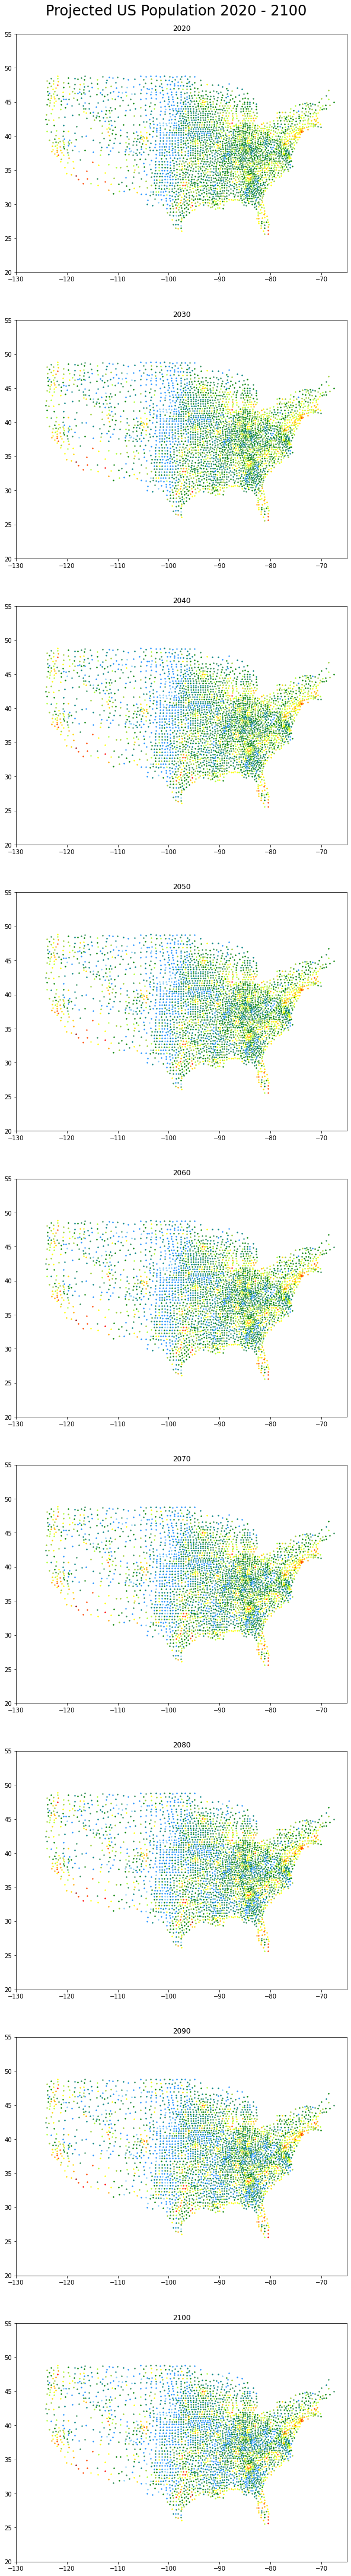

In [5]:
#setting the number of matplotlib graphs (subpolots) to 9, and editting the size and settings of the visuals
fig, graph = plt.subplots(9)
plt.subplots_adjust(top = .97)
fig.suptitle('Projected US Population 2020 - 2100', fontsize = 24)
fig.set_figwidth(10)
fig.set_figheight(70)
size = 2

#for loop runs 9 times to create 9 graphs
for i in range(9):
    #adds a row to the stats array. The first column is the year, which is done by slicing the last 4 chars from the data_pts[i]
    stats.append([data_pts[i][4:8]])

    #create a dataframe that holds the data for all counties that have a population within a range
    pop_range_1 = pop_data[((pop_data[data_pts[i]] > 1) & (pop_data[data_pts[i]] < 1000))]
    #adds the number of indicies in the above range to the stats array
    stats[i].append(len(pop_range_1.index))
    
    #repeat the above 12 more times
    pop_range_2 = pop_data[((pop_data[data_pts[i]] >= 1000) & (pop_data[data_pts[i]] < 5000))]
    stats[i].append(len(pop_range_2.index))
    pop_range_3 = pop_data[((pop_data[data_pts[i]] >= 5000) & (pop_data[data_pts[i]] < 10000))]
    stats[i].append(len(pop_range_3.index))
    pop_range_4 = pop_data[((pop_data[data_pts[i]] >= 10000) & (pop_data[data_pts[i]] < 20000))]
    stats[i].append(len(pop_range_4.index))
    pop_range_5 = pop_data[((pop_data[data_pts[i]] >= 20000) & (pop_data[data_pts[i]] < 50000))]
    stats[i].append(len(pop_range_5.index))
    pop_range_6 = pop_data[((pop_data[data_pts[i]] >= 50000) & (pop_data[data_pts[i]] < 100000))]
    stats[i].append(len(pop_range_6.index))
    pop_range_7 = pop_data[((pop_data[data_pts[i]] >= 100000) & (pop_data[data_pts[i]] < 200000))]
    stats[i].append(len(pop_range_7.index))
    pop_range_8 = pop_data[((pop_data[data_pts[i]] >= 200000) & (pop_data[data_pts[i]] < 500000))]
    stats[i].append(len(pop_range_8.index))
    pop_range_9 = pop_data[((pop_data[data_pts[i]] >= 500000) & (pop_data[data_pts[i]] < 1000000))]
    stats[i].append(len(pop_range_9.index))
    pop_range_10 = pop_data[((pop_data[data_pts[i]] >= 1000000) & (pop_data[data_pts[i]] < 2000000))]
    stats[i].append(len(pop_range_10.index))
    pop_range_11 = pop_data[((pop_data[data_pts[i]] >= 2000000) & (pop_data[data_pts[i]] < 5000000))]
    stats[i].append(len(pop_range_11.index))
    pop_range_12 = pop_data[((pop_data[data_pts[i]] >= 5000000) & (pop_data[data_pts[i]] < 10000000))]
    stats[i].append(len(pop_range_12.index))
    pop_range_13 = pop_data[((pop_data[data_pts[i]] >= 10000000))]
    stats[i].append(len(pop_range_13.index))

    #13 calls of scatter() to graph the 13 ranges with different colors
    graph[i].scatter(pop_range_1.INTPTLON10, pop_range_1.INTPTLAT10, c = 'lightskyblue', s = size)
    graph[i].scatter(pop_range_2.INTPTLON10, pop_range_2.INTPTLAT10, c = 'dodgerblue', s = size)
    graph[i].scatter(pop_range_3.INTPTLON10, pop_range_3.INTPTLAT10, c = 'teal', s = size)
    graph[i].scatter(pop_range_4.INTPTLON10, pop_range_4.INTPTLAT10, c = 'seagreen', s = size)
    graph[i].scatter(pop_range_5.INTPTLON10, pop_range_5.INTPTLAT10, c = 'green', s = size)
    graph[i].scatter(pop_range_6.INTPTLON10, pop_range_6.INTPTLAT10, c = 'yellowgreen', s = size)
    graph[i].scatter(pop_range_7.INTPTLON10, pop_range_7.INTPTLAT10, c = 'greenyellow', s = size)
    graph[i].scatter(pop_range_8.INTPTLON10, pop_range_8.INTPTLAT10, c = 'yellow', s = size)
    graph[i].scatter(pop_range_9.INTPTLON10, pop_range_9.INTPTLAT10, c = 'gold', s = size)
    graph[i].scatter(pop_range_10.INTPTLON10, pop_range_10.INTPTLAT10, c = 'orange', s = size)
    graph[i].scatter(pop_range_11.INTPTLON10, pop_range_11.INTPTLAT10, c = 'orangered', s = size)
    graph[i].scatter(pop_range_12.INTPTLON10, pop_range_12.INTPTLAT10, c = 'red', s = size)
    graph[i].scatter(pop_range_13.INTPTLON10, pop_range_13.INTPTLAT10, c = 'darkred', s = size)
    
    # setting the x and y ranges of the scatter plots and adding a title to the subgraph
    graph[i].set_xlim([-130, -65])
    graph[i].set_ylim([20, 55])
    graph[i].title.set_text(data_pts[i][4:8])



In [6]:
stats

[['2020', 34, 270, 408, 600, 826, 387, 270, 197, 93, 32, 15, 2, 1],
 ['2030', 33, 287, 415, 598, 801, 378, 257, 211, 92, 44, 15, 3, 1],
 ['2040', 34, 311, 429, 596, 765, 363, 258, 210, 92, 54, 19, 3, 1],
 ['2050', 39, 328, 449, 597, 741, 345, 239, 213, 100, 58, 22, 3, 1],
 ['2060', 41, 363, 457, 599, 712, 323, 232, 215, 106, 52, 31, 3, 1],
 ['2070', 46, 379, 487, 598, 674, 305, 232, 211, 108, 57, 34, 2, 2],
 ['2080', 54, 401, 512, 580, 654, 297, 215, 214, 108, 62, 32, 4, 2],
 ['2090', 63, 436, 524, 600, 599, 284, 207, 207, 114, 61, 32, 6, 2],
 ['2100', 62, 486, 538, 592, 569, 266, 205, 201, 117, 58, 34, 5, 2]]

#### Exporting the stats list to its own excel spreedsheet:

Finally, column names are created for the new spreedsheet, and the stats are exported to a file named "pop_projections_stats.xlsx" using pandas. 

Interesting notes: In 2020, Los Angeles is currently the only county with a population over 10M, but in 2100 it is projected that Harris County, Texas, will not only join Los Angeles in the 10M+ range, but surpase it. 

In [7]:
#creating an array that will be the header for the output excel spreadsheet
col_names = ["YEAR", "1K","2K","5K","10K","20K","50K","100K","200K","500K","1M", "2M", "5M", "10M"]
#create a pandas data frame using the above col_names and the stats 2D array
df = pd.DataFrame(stats, columns = col_names)
#export the dataframe to an excel spreedsheet
df.to_excel("pop_projections_stats.xlsx")

In [8]:
df

,YEAR,1K,2K,5K,10K,20K,50K,100K,200K,500K,1M,2M,5M,10M
0,2020,34,270,408,600,826,387,270,197,93,32,15,2,1
1,2030,33,287,415,598,801,378,257,211,92,44,15,3,1
2,2040,34,311,429,596,765,363,258,210,92,54,19,3,1
3,2050,39,328,449,597,741,345,239,213,100,58,22,3,1
4,2060,41,363,457,599,712,323,232,215,106,52,31,3,1
5,2070,46,379,487,598,674,305,232,211,108,57,34,2,2
6,2080,54,401,512,580,654,297,215,214,108,62,32,4,2
7,2090,63,436,524,600,599,284,207,207,114,61,32,6,2
8,2100,62,486,538,592,569,266,205,201,117,58,34,5,2
